In [36]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [37]:
#linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/home/jmanos/notebooks/Non_filtered_rhone_v2/Rhone_data_continuous_nofilt.h5")
#linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5")
linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

da = df_all_chan.to_numpy()

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [38]:
window_input_width = 200

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

In [39]:
print(multi_step_window_shuffled.example)

(<tf.Tensor: shape=(16, 200, 2308), dtype=float32, numpy=
array([[[-3.60525012e-01, -3.45753849e-01, -5.14210999e-01, ...,
         -1.63725102e+00,  2.46058369e+00,  4.72802371e-01],
        [-2.37699561e-02, -3.59966874e-01, -8.49045873e-01, ...,
         -1.33512223e+00,  1.78153157e+00,  1.67255834e-01],
        [ 9.63524580e-01,  5.52609444e-01, -3.11399370e-01, ...,
         -8.38352203e-01,  1.93823814e+00,  3.49320590e-01],
        ...,
        [-3.69170547e-01,  1.83505625e-01,  1.30118120e+00, ...,
         -1.36341238e+00, -1.14519858e+00, -2.26273108e+00],
        [-5.31374216e-01, -3.85223001e-01,  6.59879744e-01, ...,
         -1.63823533e+00, -1.62033236e+00, -2.32761741e+00],
        [ 6.07038379e-01, -1.44148362e+00, -7.05049783e-02, ...,
         -1.63051498e+00, -2.05741930e+00, -2.27523661e+00]],

       [[ 4.56930071e-01, -2.67685741e-01, -2.38938272e-01, ...,
         -6.28128052e-02,  2.95068479e+00,  3.06335258e+00],
        [-6.34500027e-01,  4.02108759e-01,  5

In [40]:
history = {}
val_performance = {}
performance = {}

In [ ]:
history['linear_'+str(window_input_width)] = d2d.compile_and_fit(linear_model, multi_step_window_shuffled, learning_rate = 0.001)
history['dnn_'+str(window_input_width)] = d2d.compile_and_fit(dnn_model, multi_step_window_shuffled, learning_rate = 0.001)
history['lstm_'+str(window_input_width)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
#history['conv_'+str(width)] = d2d.compile_and_fit(conv_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

val_performance['linear_'+str(window_input_width)] = linear_model.evaluate(multi_step_window_shuffled.val)
performance['linear_'+str(window_input_width)] = linear_model.evaluate(multi_step_window_shuffled.test, verbose=0)

val_performance['dnn_'+str(window_input_width)] = dnn_model.evaluate(multi_step_window_shuffled.val)
performance['dnn_'+str(window_input_width)] = dnn_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Epoch 1/100
14/14 [==============================] - 0s 24ms/step - loss: 44261.8750 - mean_absolute_error: 130.3386 - val_loss: 79420.1094 - val_mean_absolute_error: 161.7914
Epoch 2/100
14/14 [==============================] - 0s 23ms/step - loss: 82553.3594 - mean_absolute_error: 165.9969 - val_loss: 89245.4688 - val_mean_absolute_error: 242.5399
Epoch 3/100
14/14 [==============================] - 0s 23ms/step - loss: 161015.3594 - mean_absolute_error: 218.9681 - val_loss: 118539.5703 - val_mean_absolute_error: 222.0440
Epoch 4/100
14/14 [==============================] - 0s 23ms/step - loss: 134763.0469 - mean_absolute_error: 197.4482 - val_loss: 95507.5000 - val_mean_absolute_error: 186.5526
Epoch 5/100
14/14 [==============================] - 0s 23ms/step - loss: 173247.2812 - mean_absolute_error: 218.1298 - val_loss: 133515.1250 - val_mean_absolute_error: 213.8328
Epoch 6/100
14/14 [==============================] - 0s 22ms/step - loss: 190961.7031 - mean_absolute_error: 223.84

Epoch 7/100
14/14 [==============================] - 1s 68ms/step - loss: 0.7334 - mean_absolute_error: 0.5095 - val_loss: 1.1011 - val_mean_absolute_error: 0.6986
Epoch 8/100
14/14 [==============================] - 1s 69ms/step - loss: 0.6641 - mean_absolute_error: 0.4659 - val_loss: 0.9438 - val_mean_absolute_error: 0.6517
Epoch 9/100
14/14 [==============================] - 1s 69ms/step - loss: 0.5862 - mean_absolute_error: 0.4281 - val_loss: 0.8369 - val_mean_absolute_error: 0.6158
Epoch 10/100
14/14 [==============================] - 1s 68ms/step - loss: 0.5428 - mean_absolute_error: 0.3973 - val_loss: 0.7568 - val_mean_absolute_error: 0.5774
Epoch 11/100
14/14 [==============================] - 1s 68ms/step - loss: 0.5066 - mean_absolute_error: 0.3671 - val_loss: 0.7098 - val_mean_absolute_error: 0.5510
Epoch 12/100
14/14 [==============================] - 1s 70ms/step - loss: 0.4845 - mean_absolute_error: 0.3436 - val_loss: 0.6900 - val_mean_absolute_error: 0.5515
Epoch 13/100


Epoch 57/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0582 - mean_absolute_error: 0.0854 - val_loss: 0.3110 - val_mean_absolute_error: 0.3069
Epoch 58/100
14/14 [==============================] - 1s 68ms/step - loss: 0.0570 - mean_absolute_error: 0.0859 - val_loss: 0.2997 - val_mean_absolute_error: 0.2974
Epoch 59/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0552 - mean_absolute_error: 0.0796 - val_loss: 0.2911 - val_mean_absolute_error: 0.3023
Epoch 60/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0544 - mean_absolute_error: 0.0840 - val_loss: 0.2992 - val_mean_absolute_error: 0.2953
Epoch 61/100
14/14 [==============================] - 1s 69ms/step - loss: 0.0534 - mean_absolute_error: 0.0839 - val_loss: 0.3105 - val_mean_absolute_error: 0.3120
Epoch 62/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0516 - mean_absolute_error: 0.0786 - val_loss: 0.2937 - val_mean_absolute_error: 0.2958
Epoch 63/1

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('linear_200','lstm_200','dnn_200'),
                           ('Linear (200 Timesteps)','LSTM (200 Timesteps)','DNN (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

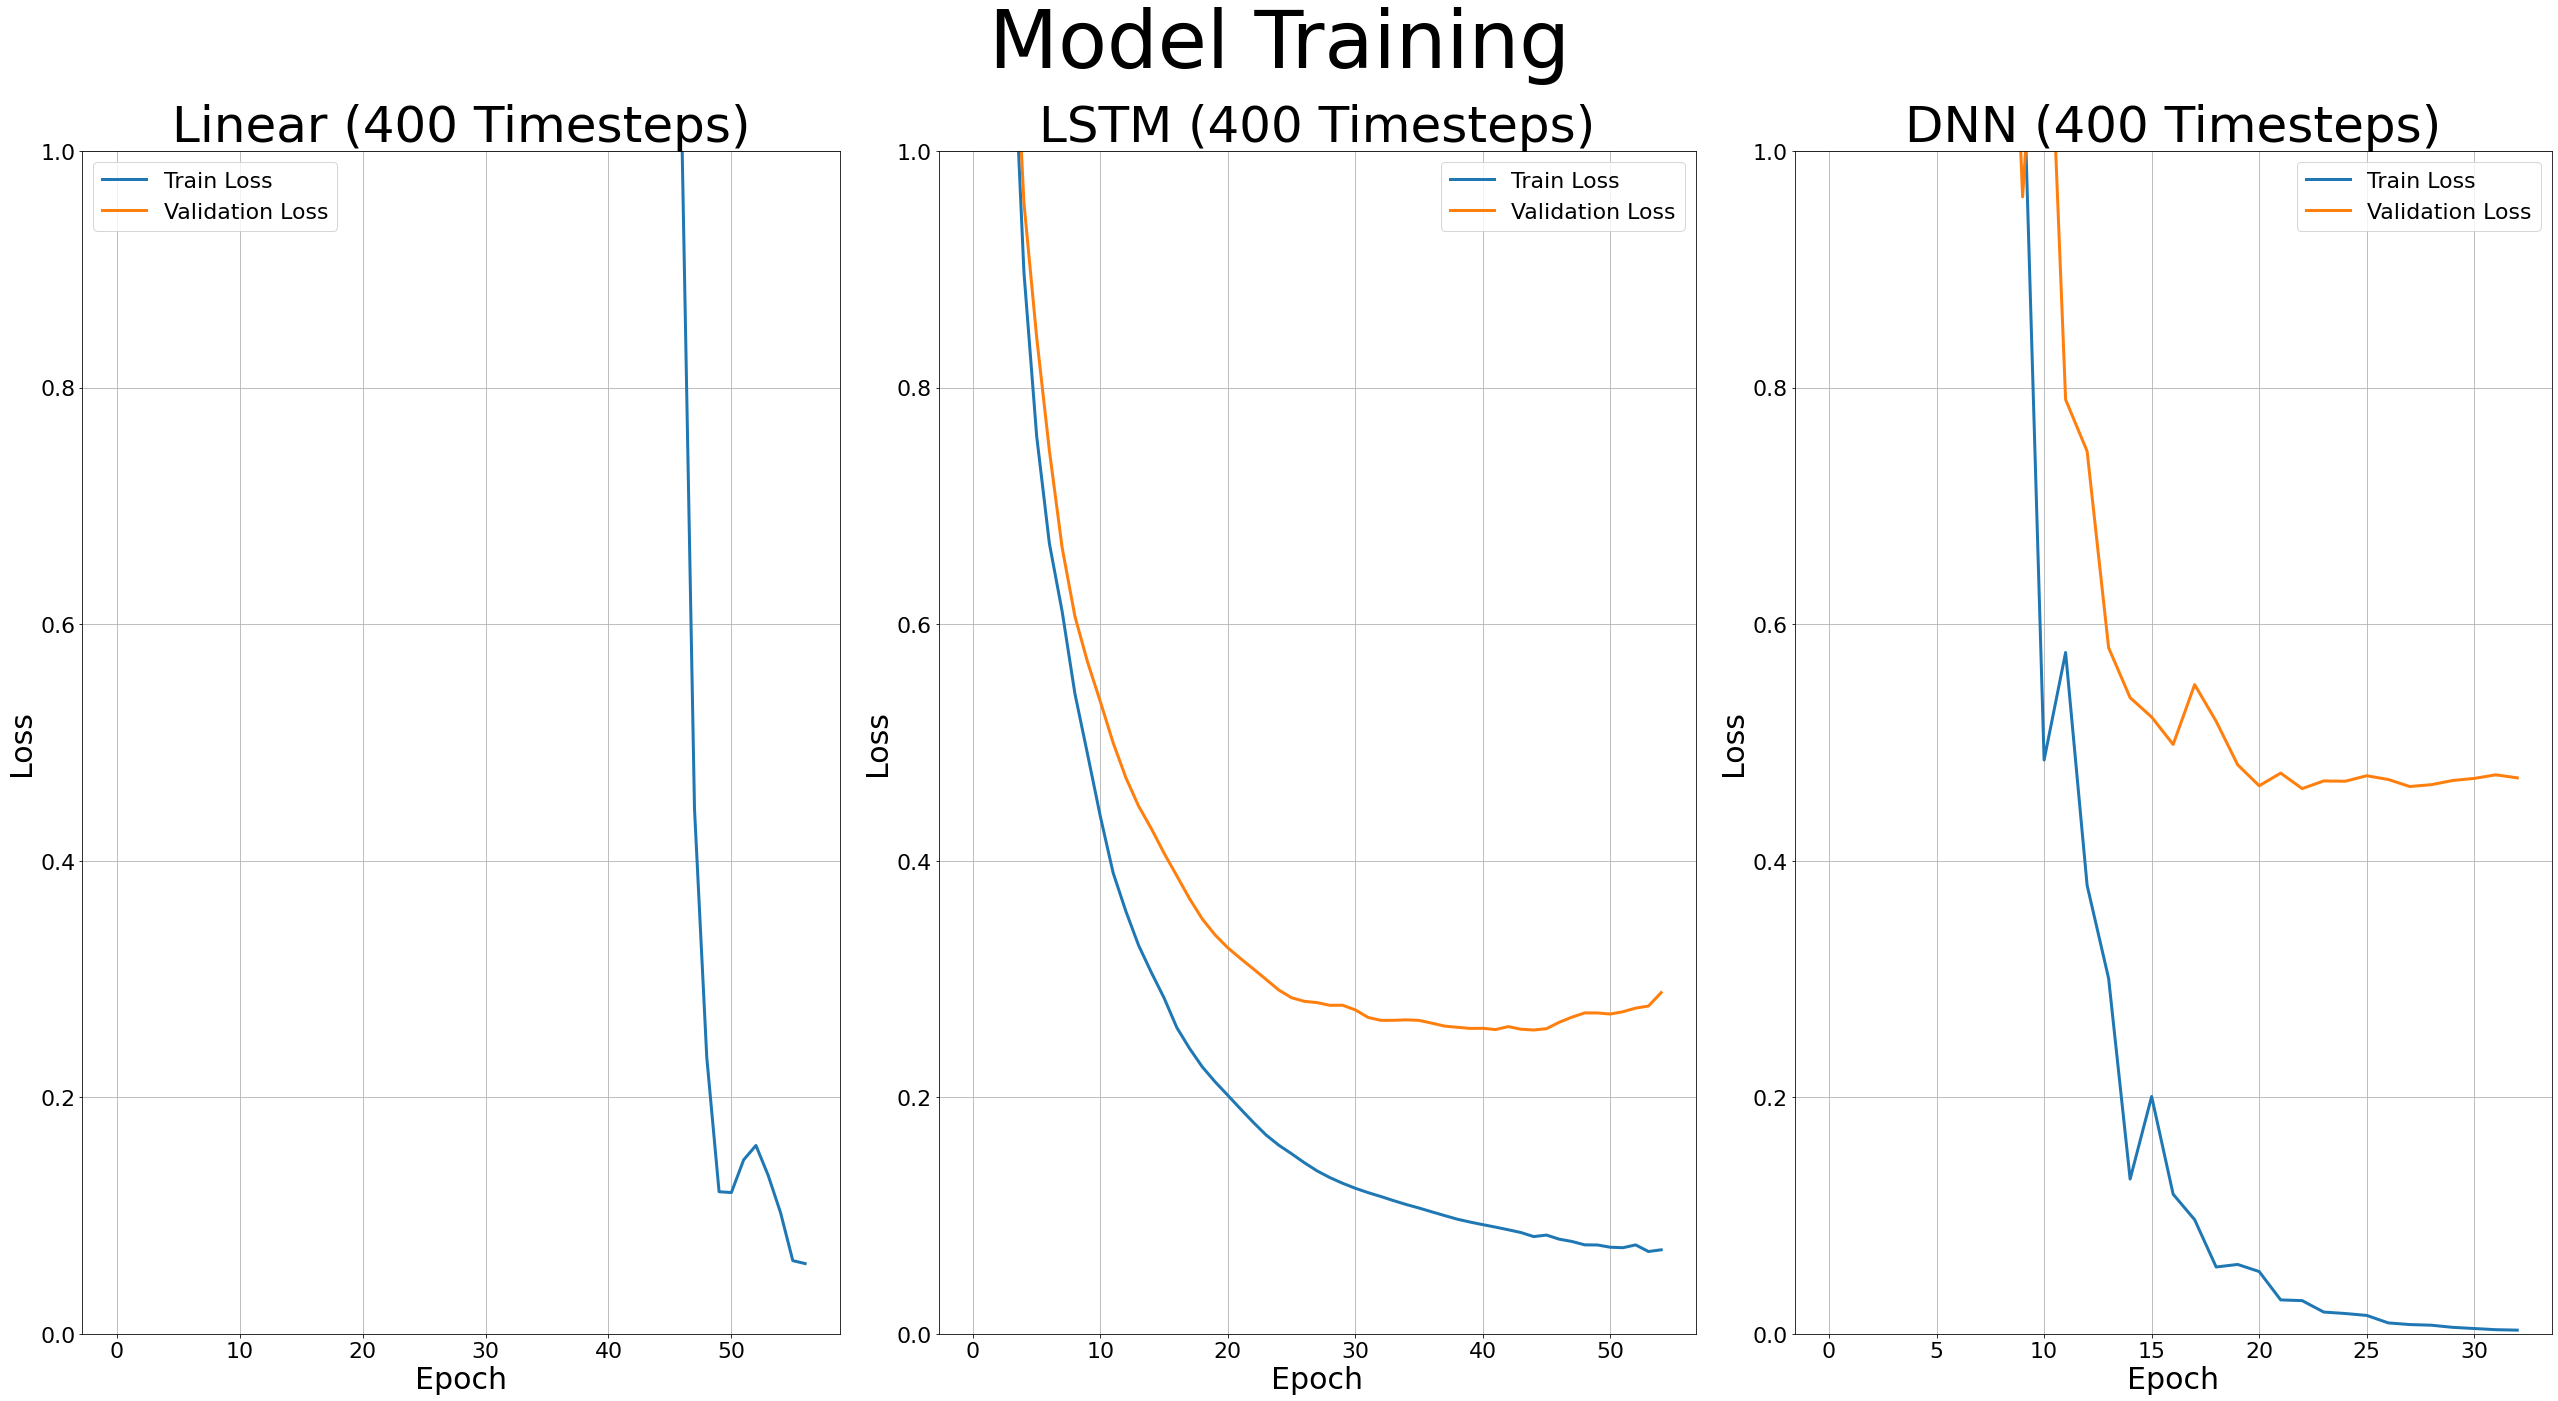

In [127]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('linear_400','lstm_400','dnn_400'),
                           ('Linear (400 Timesteps)','LSTM (400 Timesteps)','DNN (400 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0,1))
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

# Randomness tests - only using Highpass and LSTM

In [1]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

da = df_all_chan.to_numpy()

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [3]:
window_input_width = 200

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
history = {}
val_performance = {}
performance = {}

In [5]:
history['lstm_'+str(window_input_width)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)


val_performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Epoch 1/100
14/14 [==============================] - 3s 101ms/step - loss: 3.7466 - mean_absolute_error: 1.4477 - val_loss: 2.2450 - val_mean_absolute_error: 1.1939
Epoch 2/100
14/14 [==============================] - 1s 78ms/step - loss: 1.4934 - mean_absolute_error: 0.8843 - val_loss: 1.5943 - val_mean_absolute_error: 0.9345
Epoch 3/100
14/14 [==============================] - 1s 81ms/step - loss: 1.0279 - mean_absolute_error: 0.7115 - val_loss: 1.3336 - val_mean_absolute_error: 0.8513
Epoch 4/100
14/14 [==============================] - 1s 87ms/step - loss: 0.8359 - mean_absolute_error: 0.6392 - val_loss: 1.2331 - val_mean_absolute_error: 0.7852
Epoch 5/100
14/14 [==============================] - 1s 76ms/step - loss: 0.7911 - mean_absolute_error: 0.6003 - val_loss: 1.0578 - val_mean_absolute_error: 0.7484
Epoch 6/100
14/14 [==============================] - 1s 76ms/step - loss: 0.7355 - mean_absolute_error: 0.5821 - val_loss: 1.1497 - val_mean_absolute_error: 0.7726
Epoch 7/100
14/

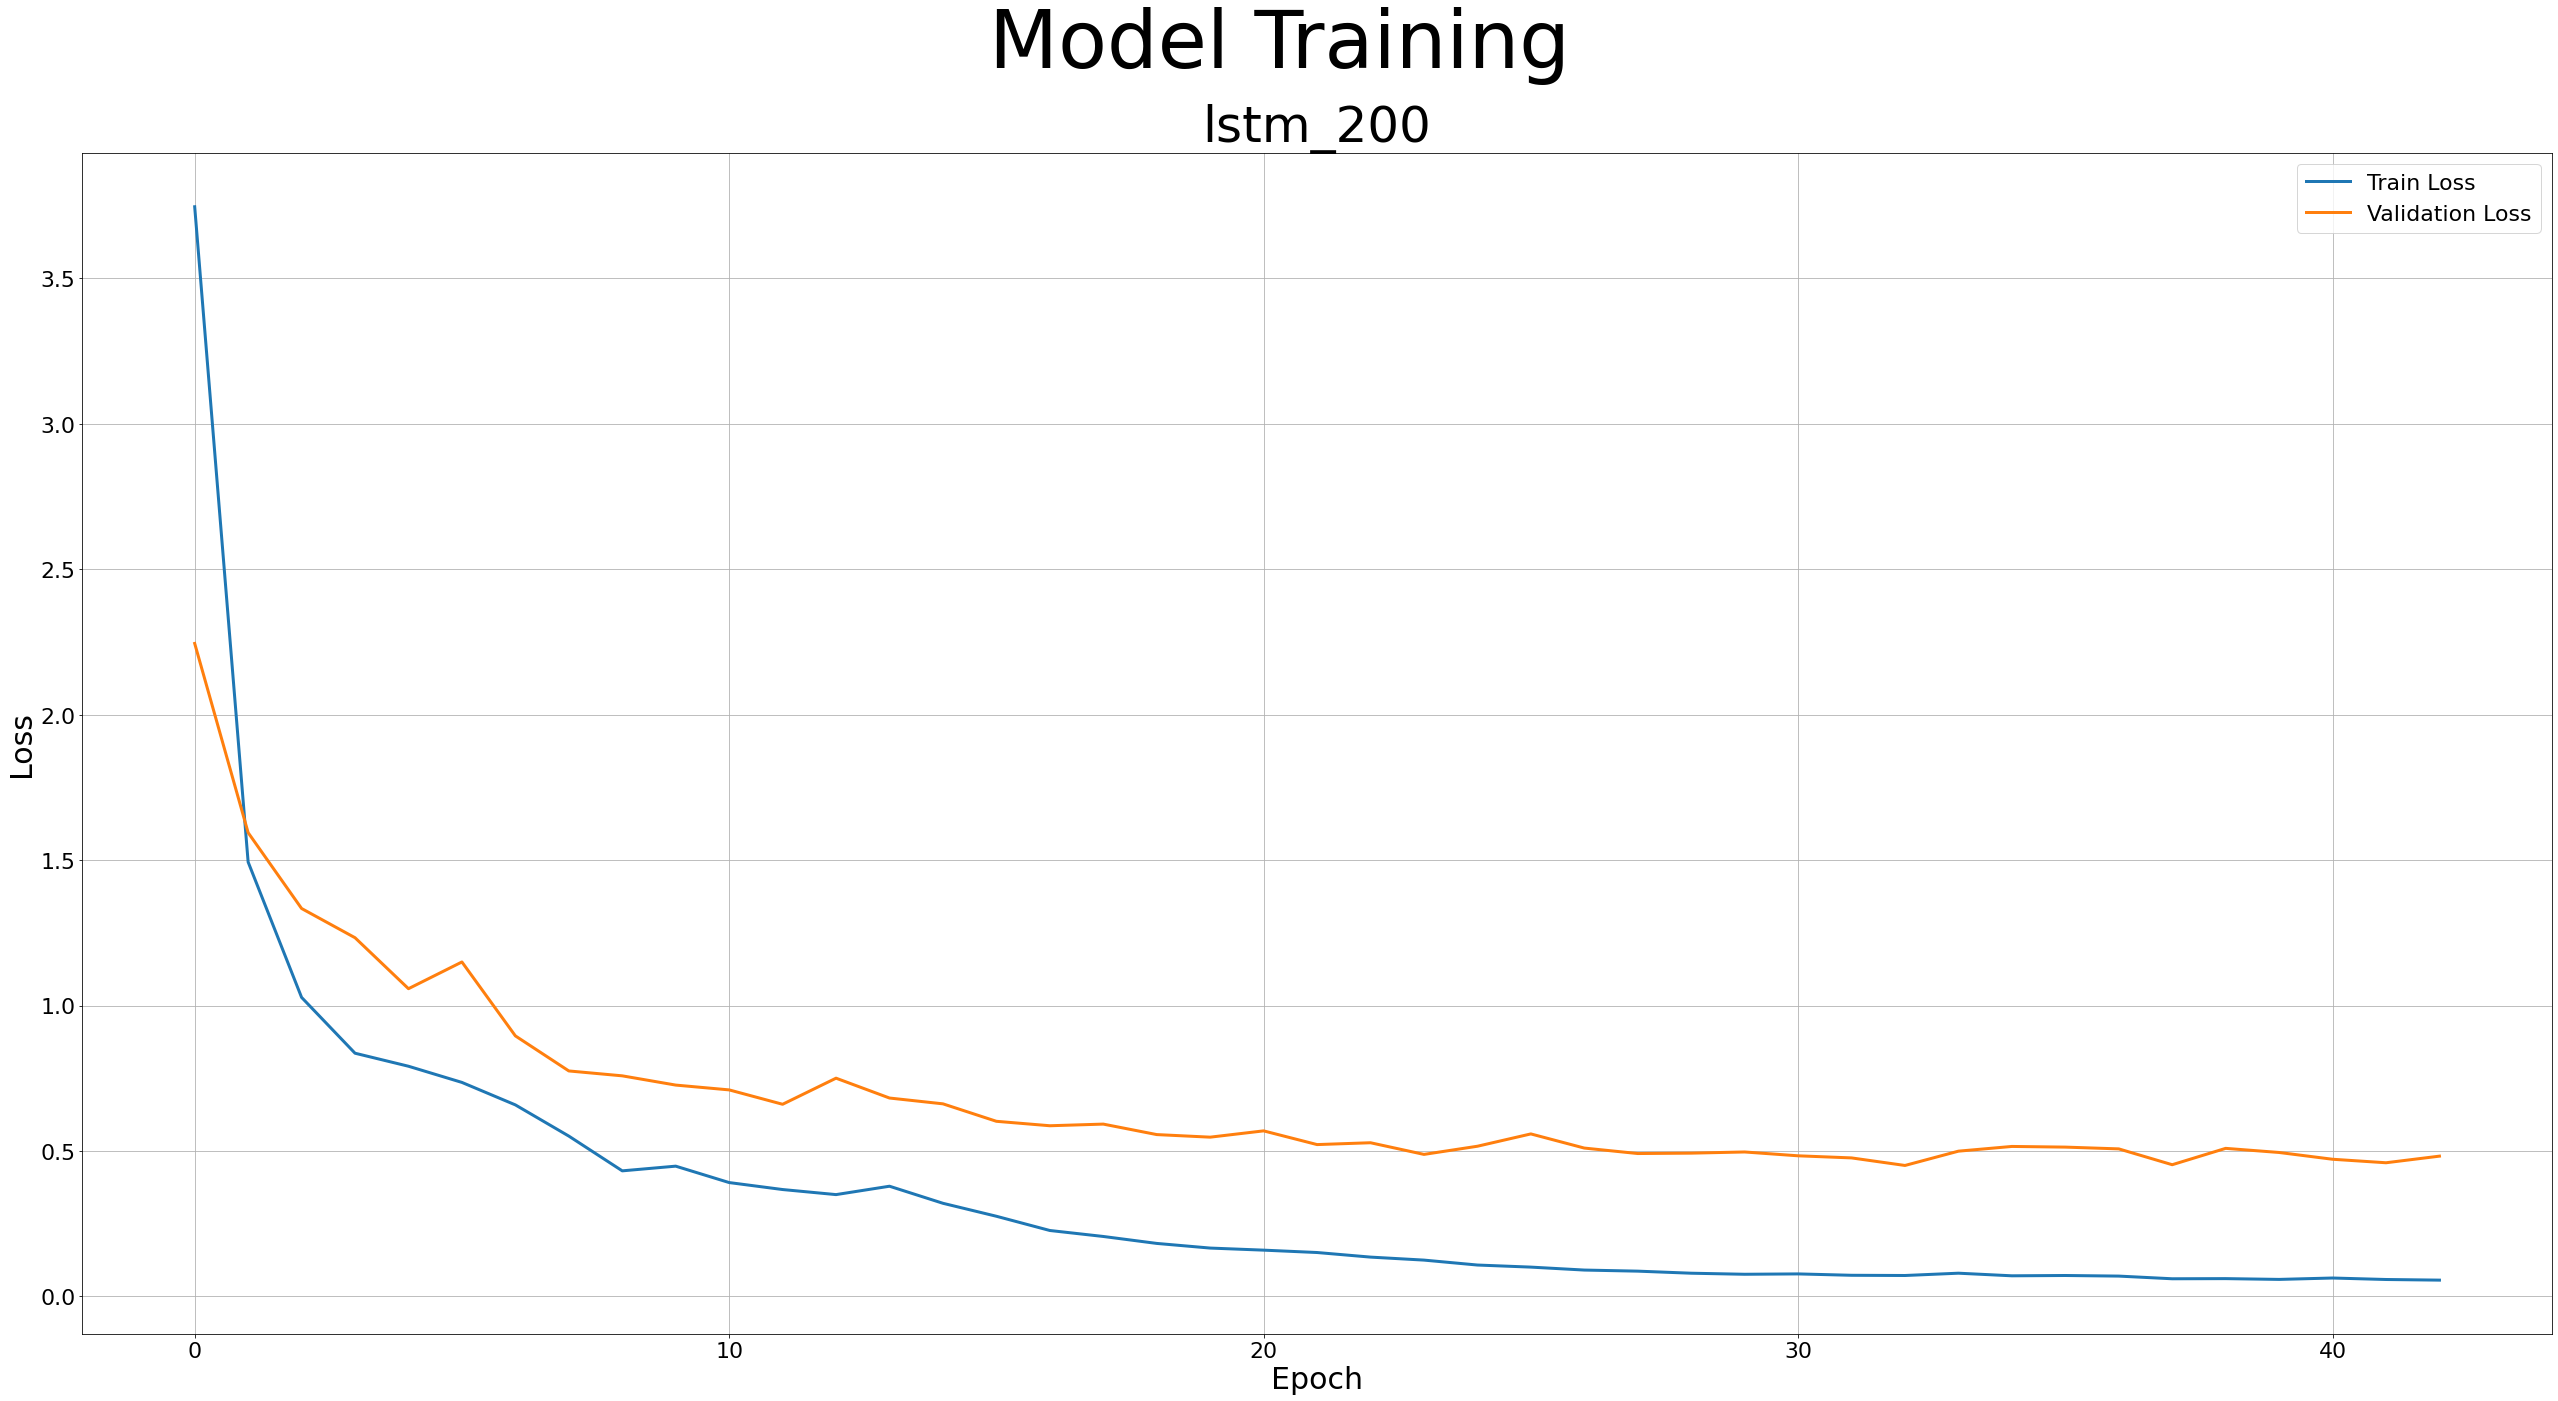

In [7]:
#Plotting one graph

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ax0 = plt.subplots(nrows=1, 
                         ncols=1, 
                         sharey=False, 
                         sharex=False,
                         figsize=(36,20))
fig.patch.set_facecolor('white')


ax0.plot(history['lstm_200'].history['loss'], label='Train Loss',linewidth=3)
ax0.plot(history['lstm_200'].history['val_loss'], label='Validation Loss',linewidth=3)
ax0.grid(True)
ax0.legend()
ax0.set_title('lstm_200',size=50)
ax0.set_ylabel('Loss', size=30)
ax0.set_xlabel('Epoch', size=30)
#ax0.set_ylim([0,1])
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

# OK individual runs are reproduceable, what about a For loop?

In [16]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [17]:
history = {}
val_performance = {}
performance = {}

In [18]:
window_size_array = [200, 200, 200]
run = [1,2,3]



for window_input_width, i in zip(window_size_array, run):
    
    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

    da = df_all_chan.to_numpy()
    
    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
        input_width=window_input_width, label_width=1, shift=0,
        label_columns=['Discharge'],
        input_columns=input_columns,
        shuffle=True)
    
    history['lstm_'+str(window_input_width)+'_'+str(i)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)


    val_performance['lstm_'+str(window_input_width)+'_'+str(i)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_input_width)+'_'+str(i)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Epoch 1/100
14/14 [==============================] - 2s 92ms/step - loss: 3.7466 - mean_absolute_error: 1.4477 - val_loss: 2.2450 - val_mean_absolute_error: 1.1939
Epoch 2/100
14/14 [==============================] - 1s 73ms/step - loss: 1.4934 - mean_absolute_error: 0.8843 - val_loss: 1.5943 - val_mean_absolute_error: 0.9345
Epoch 3/100
14/14 [==============================] - 1s 72ms/step - loss: 1.0279 - mean_absolute_error: 0.7115 - val_loss: 1.3336 - val_mean_absolute_error: 0.8513
Epoch 4/100
14/14 [==============================] - 1s 71ms/step - loss: 0.8359 - mean_absolute_error: 0.6392 - val_loss: 1.2331 - val_mean_absolute_error: 0.7852
Epoch 5/100
14/14 [==============================] - 1s 71ms/step - loss: 0.7911 - mean_absolute_error: 0.6003 - val_loss: 1.0578 - val_mean_absolute_error: 0.7484
Epoch 6/100
14/14 [==============================] - 1s 70ms/step - loss: 0.7355 - mean_absolute_error: 0.5821 - val_loss: 1.1497 - val_mean_absolute_error: 0.7726
Epoch 7/100
14/1

Epoch 7/100
14/14 [==============================] - 1s 73ms/step - loss: 0.6582 - mean_absolute_error: 0.5585 - val_loss: 0.8955 - val_mean_absolute_error: 0.7035
Epoch 8/100
14/14 [==============================] - 1s 71ms/step - loss: 0.5510 - mean_absolute_error: 0.5083 - val_loss: 0.7750 - val_mean_absolute_error: 0.6486
Epoch 9/100
14/14 [==============================] - 1s 71ms/step - loss: 0.4314 - mean_absolute_error: 0.4429 - val_loss: 0.7581 - val_mean_absolute_error: 0.6432
Epoch 10/100
14/14 [==============================] - 1s 72ms/step - loss: 0.4476 - mean_absolute_error: 0.4605 - val_loss: 0.7264 - val_mean_absolute_error: 0.6365
Epoch 11/100
14/14 [==============================] - 1s 73ms/step - loss: 0.3911 - mean_absolute_error: 0.4232 - val_loss: 0.7098 - val_mean_absolute_error: 0.5964
Epoch 12/100
14/14 [==============================] - 1s 71ms/step - loss: 0.3672 - mean_absolute_error: 0.3896 - val_loss: 0.6603 - val_mean_absolute_error: 0.5773
Epoch 13/100


Epoch 13/100
14/14 [==============================] - 1s 74ms/step - loss: 0.3497 - mean_absolute_error: 0.3812 - val_loss: 0.7501 - val_mean_absolute_error: 0.6359
Epoch 14/100
14/14 [==============================] - 1s 73ms/step - loss: 0.3786 - mean_absolute_error: 0.3945 - val_loss: 0.6818 - val_mean_absolute_error: 0.5986
Epoch 15/100
14/14 [==============================] - 1s 72ms/step - loss: 0.3199 - mean_absolute_error: 0.3627 - val_loss: 0.6619 - val_mean_absolute_error: 0.5800
Epoch 16/100
14/14 [==============================] - 1s 72ms/step - loss: 0.2753 - mean_absolute_error: 0.3298 - val_loss: 0.6018 - val_mean_absolute_error: 0.5488
Epoch 17/100
14/14 [==============================] - 1s 72ms/step - loss: 0.2263 - mean_absolute_error: 0.2952 - val_loss: 0.5865 - val_mean_absolute_error: 0.5388
Epoch 18/100
14/14 [==============================] - 1s 73ms/step - loss: 0.2058 - mean_absolute_error: 0.2765 - val_loss: 0.5922 - val_mean_absolute_error: 0.5448
Epoch 19/1

### For the for loop to work properly and be repeatable, must rebuild the model each time in the loop

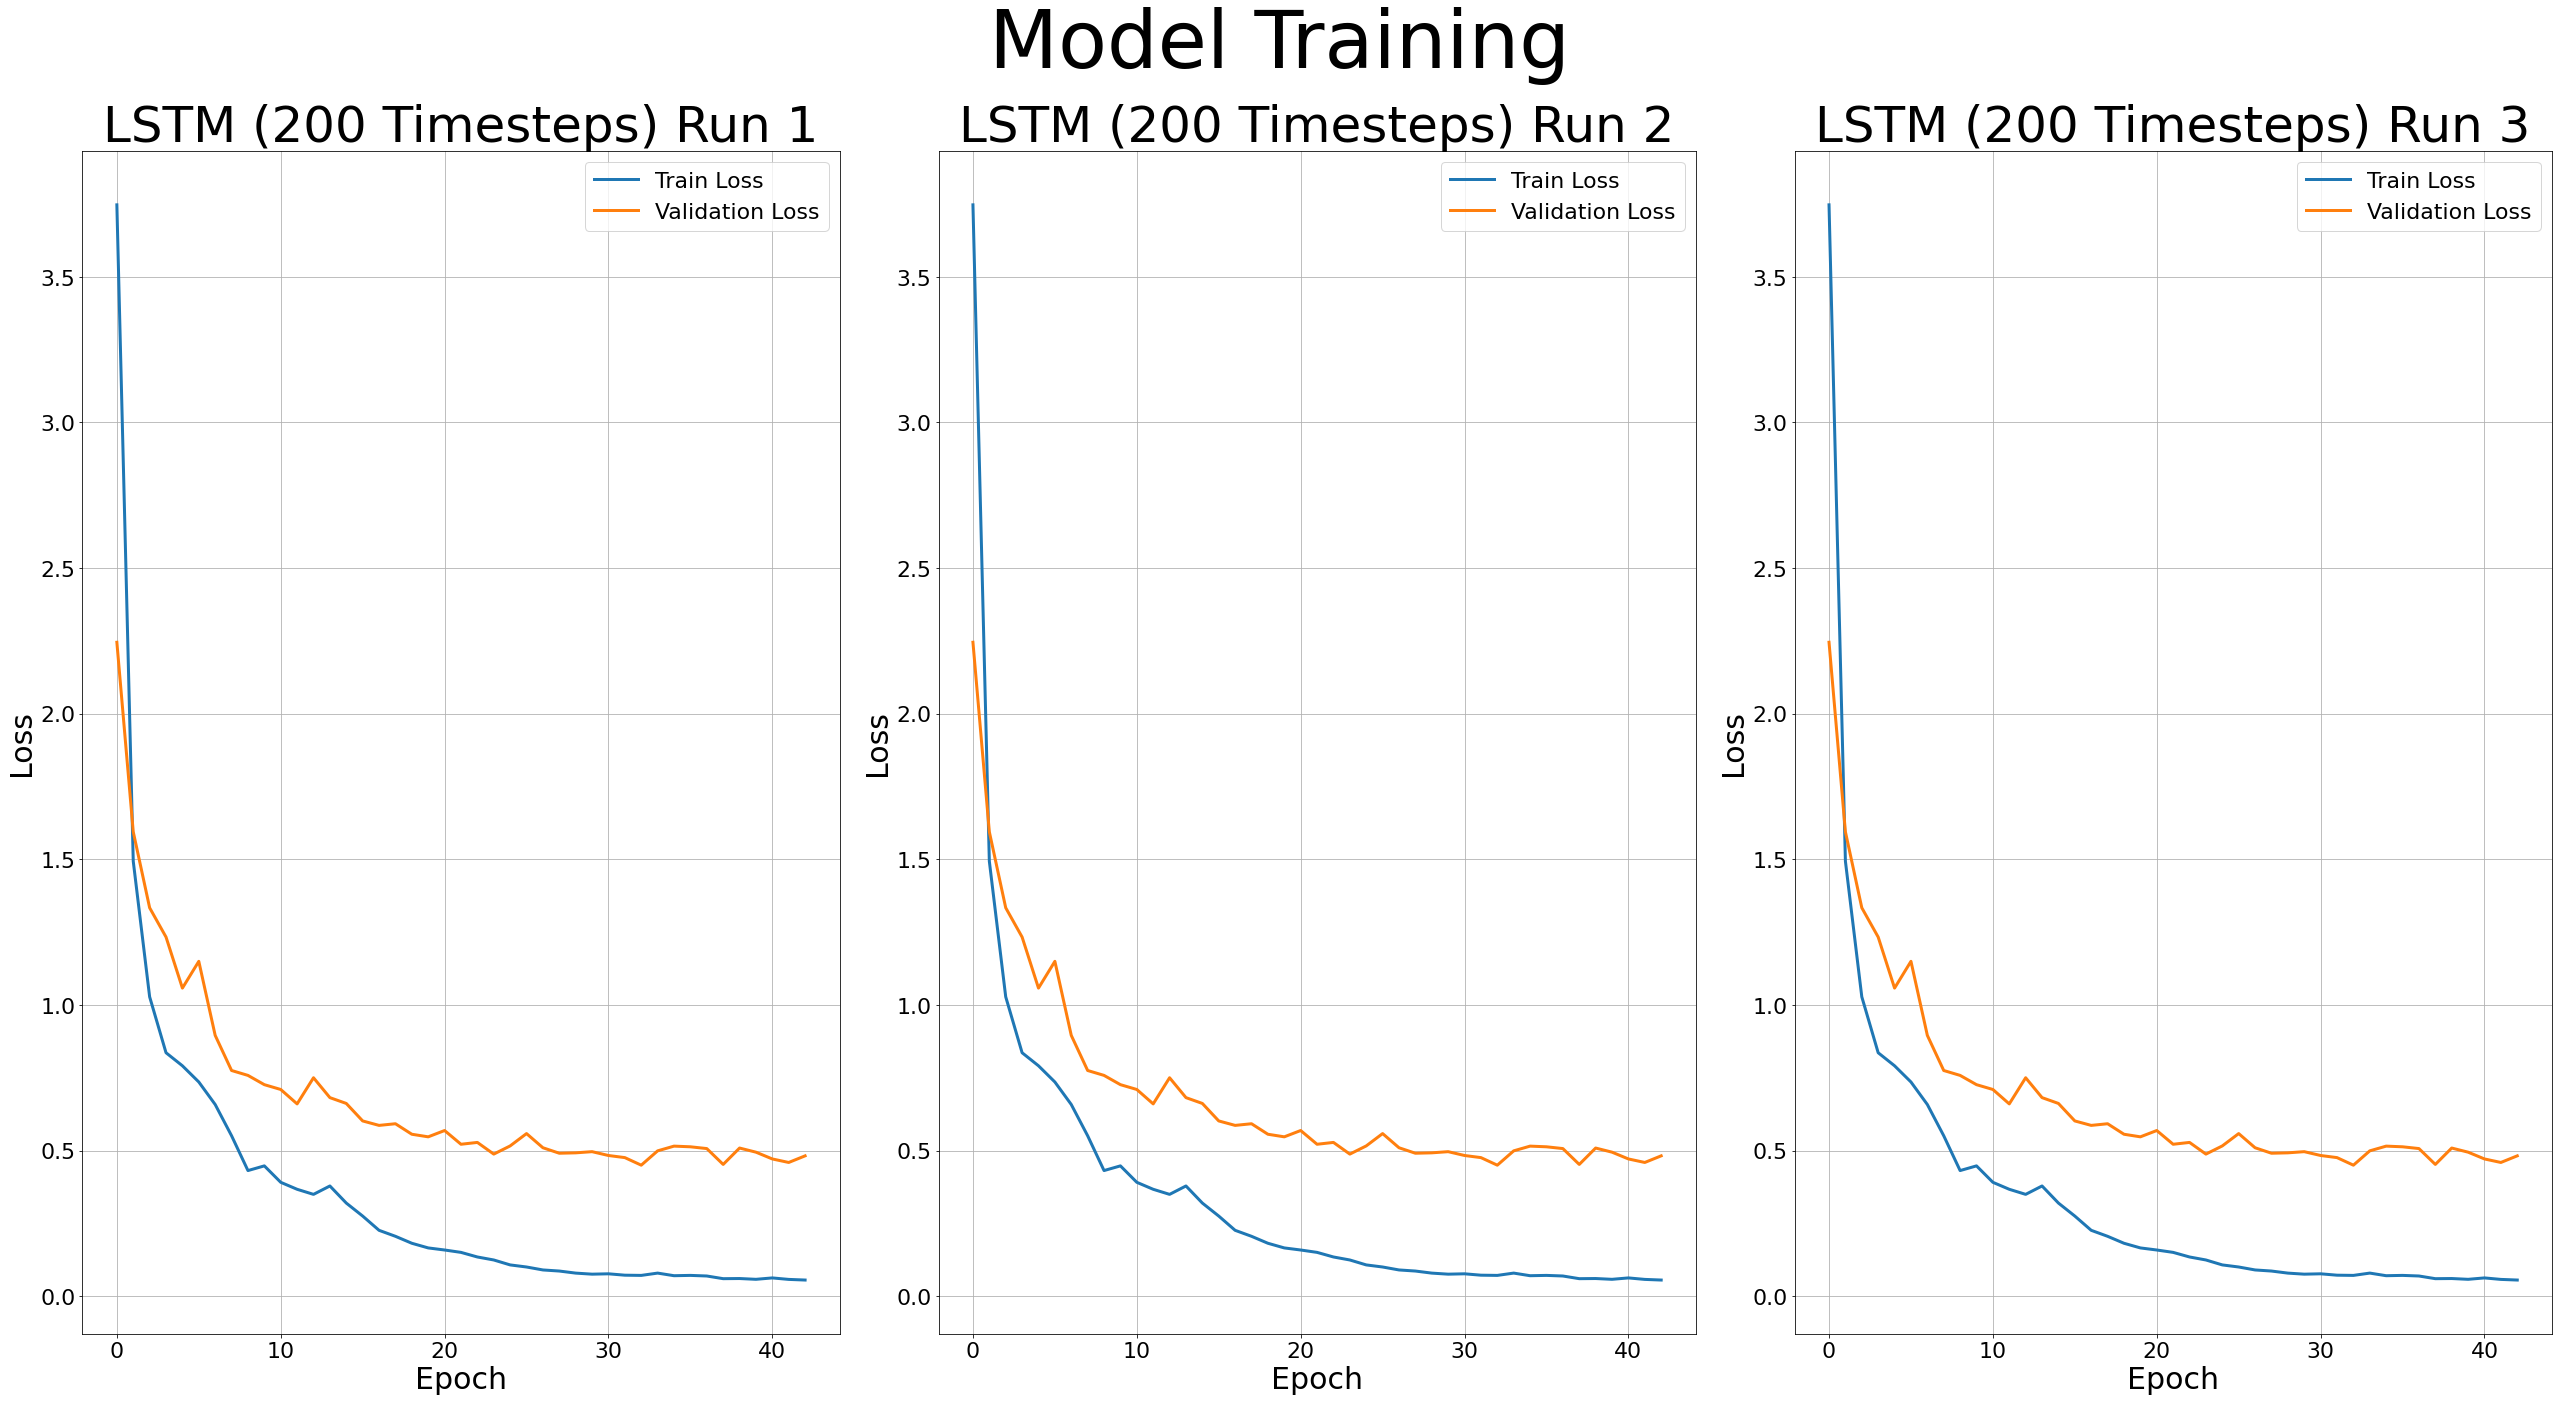

In [19]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('lstm_200_1','lstm_200_2','lstm_200_3'),
                           ('LSTM (200 Timesteps) Run 1','LSTM (200 Timesteps) Run 2','LSTM (200 Timesteps) Run 3')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    #ax.set_ylim([0,1])
    #ax.set_xlim([0,45])
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

### OK above code prodcuces repeatable resutls now in a loop, must invoke the seeds and rebuild models from within the loops

# What about a for loop with different window sizes with 200 included.

In [24]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [25]:
history = {}
val_performance = {}
performance = {}

In [26]:
window_size_array = [150, 200, 250]
run = [1,2,3]



for window_input_width, i in zip(window_size_array, run):
    
    SEED = 1
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
        input_width=window_input_width, label_width=1, shift=0,
        label_columns=['Discharge'],
        input_columns=input_columns,
        shuffle=True)
    
    history['lstm_'+str(window_input_width)+'_'+str(i)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)


    val_performance['lstm_'+str(window_input_width)+'_'+str(i)] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_input_width)+'_'+str(i)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
18/18 [==============================] - 2s 67ms/step - loss: 5.1004 - mean_absolute_error: 1.7461 - val_loss: 3.1323 - val_mean_absolute_error: 1.3451
Epoch 2/100
18/18 [==============================] - 1s 55ms/step - loss: 2.4799 - mean_absolute_error: 1.1537 - val_loss: 2.0606 - val_mean_absolute_error: 1.0821
Epoch 3/100
18/18 [==============================] - 1s 53ms/step - loss: 1.6635 - mean_absolute_error: 0.9135 - val_loss: 1.4437 - val_mean_absolute_error: 0.8727
Epoch 4/100
18/18 [==============================] - 1s 54ms/step - loss: 1.1636 - mean_absolute_error: 0.7669 - val_loss: 1.0983 - val_mean_absolute_error: 0.7544
Epoch 5/100
18/18 [==============================] - 1s 55ms/step - loss: 0.8890 - mean_absolute_error: 0.6567 - val_loss: 0.8638 - val_mean_absolute_error: 0.6604
Epoch 6/100
18/18 [==============================] - 1s 54ms/step - loss: 0.7518 - mean_absolute_error: 0.5765 - val_loss: 0

18/18 [==============================] - 1s 54ms/step - loss: 0.1026 - mean_absolute_error: 0.1483 - val_loss: 0.3699 - val_mean_absolute_error: 0.3262
Epoch 51/100
18/18 [==============================] - 1s 53ms/step - loss: 0.1037 - mean_absolute_error: 0.1494 - val_loss: 0.3926 - val_mean_absolute_error: 0.3551
Epoch 52/100
5/5 [==============================] - 0s 21ms/step - loss: 0.3709 - mean_absolute_error: 0.3444
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
14/14 [==============================] - 2s 90ms/step - loss: 3.7466 - mean_absolute_error: 1.4477 - val_loss: 2.2450 - val_mean_absolute_error: 1.1939
Epoch 2/100
14/14 [==============================] - 1s 75ms/step - loss: 1.4934 - mean_absolute_error: 0.8843 - val_loss: 1.5943 - val_mean_absolute_error: 0.9345
Epoch 3/100
14/14 [==============================] - 1s 74ms/step - loss: 1.0279 - mean_absolute_error: 0.7115 - val_loss: 1.3336 - val_mean_absolute_error: 0.8513
Epoch 4/100
14/14 [======

Epoch 3/100
11/11 [==============================] - 1s 93ms/step - loss: 2.6754 - mean_absolute_error: 1.1837 - val_loss: 3.5284 - val_mean_absolute_error: 1.4617
Epoch 4/100
11/11 [==============================] - 1s 93ms/step - loss: 2.3623 - mean_absolute_error: 1.0955 - val_loss: 3.0926 - val_mean_absolute_error: 1.3407
Epoch 5/100
11/11 [==============================] - 1s 94ms/step - loss: 2.0692 - mean_absolute_error: 1.0145 - val_loss: 2.6644 - val_mean_absolute_error: 1.2490
Epoch 6/100
11/11 [==============================] - 1s 92ms/step - loss: 1.7377 - mean_absolute_error: 0.9215 - val_loss: 2.3612 - val_mean_absolute_error: 1.1554
Epoch 7/100
11/11 [==============================] - 1s 92ms/step - loss: 1.5648 - mean_absolute_error: 0.8661 - val_loss: 1.9344 - val_mean_absolute_error: 1.0476
Epoch 8/100
11/11 [==============================] - 1s 92ms/step - loss: 1.3155 - mean_absolute_error: 0.7839 - val_loss: 1.7925 - val_mean_absolute_error: 0.9778
Epoch 9/100
11/1

Epoch 53/100
11/11 [==============================] - 1s 92ms/step - loss: 0.1348 - mean_absolute_error: 0.1816 - val_loss: 0.4402 - val_mean_absolute_error: 0.3796
Epoch 54/100
11/11 [==============================] - 1s 93ms/step - loss: 0.1232 - mean_absolute_error: 0.1687 - val_loss: 0.4265 - val_mean_absolute_error: 0.3843
Epoch 55/100
11/11 [==============================] - 1s 90ms/step - loss: 0.1236 - mean_absolute_error: 0.1693 - val_loss: 0.4334 - val_mean_absolute_error: 0.3831
Epoch 56/100
11/11 [==============================] - 1s 92ms/step - loss: 0.1308 - mean_absolute_error: 0.1773 - val_loss: 0.4452 - val_mean_absolute_error: 0.3887
Epoch 57/100
11/11 [==============================] - 1s 91ms/step - loss: 0.1284 - mean_absolute_error: 0.1727 - val_loss: 0.4391 - val_mean_absolute_error: 0.3931
Epoch 58/100
11/11 [==============================] - 1s 89ms/step - loss: 0.1268 - mean_absolute_error: 0.1688 - val_loss: 0.4335 - val_mean_absolute_error: 0.3753
Epoch 59/1

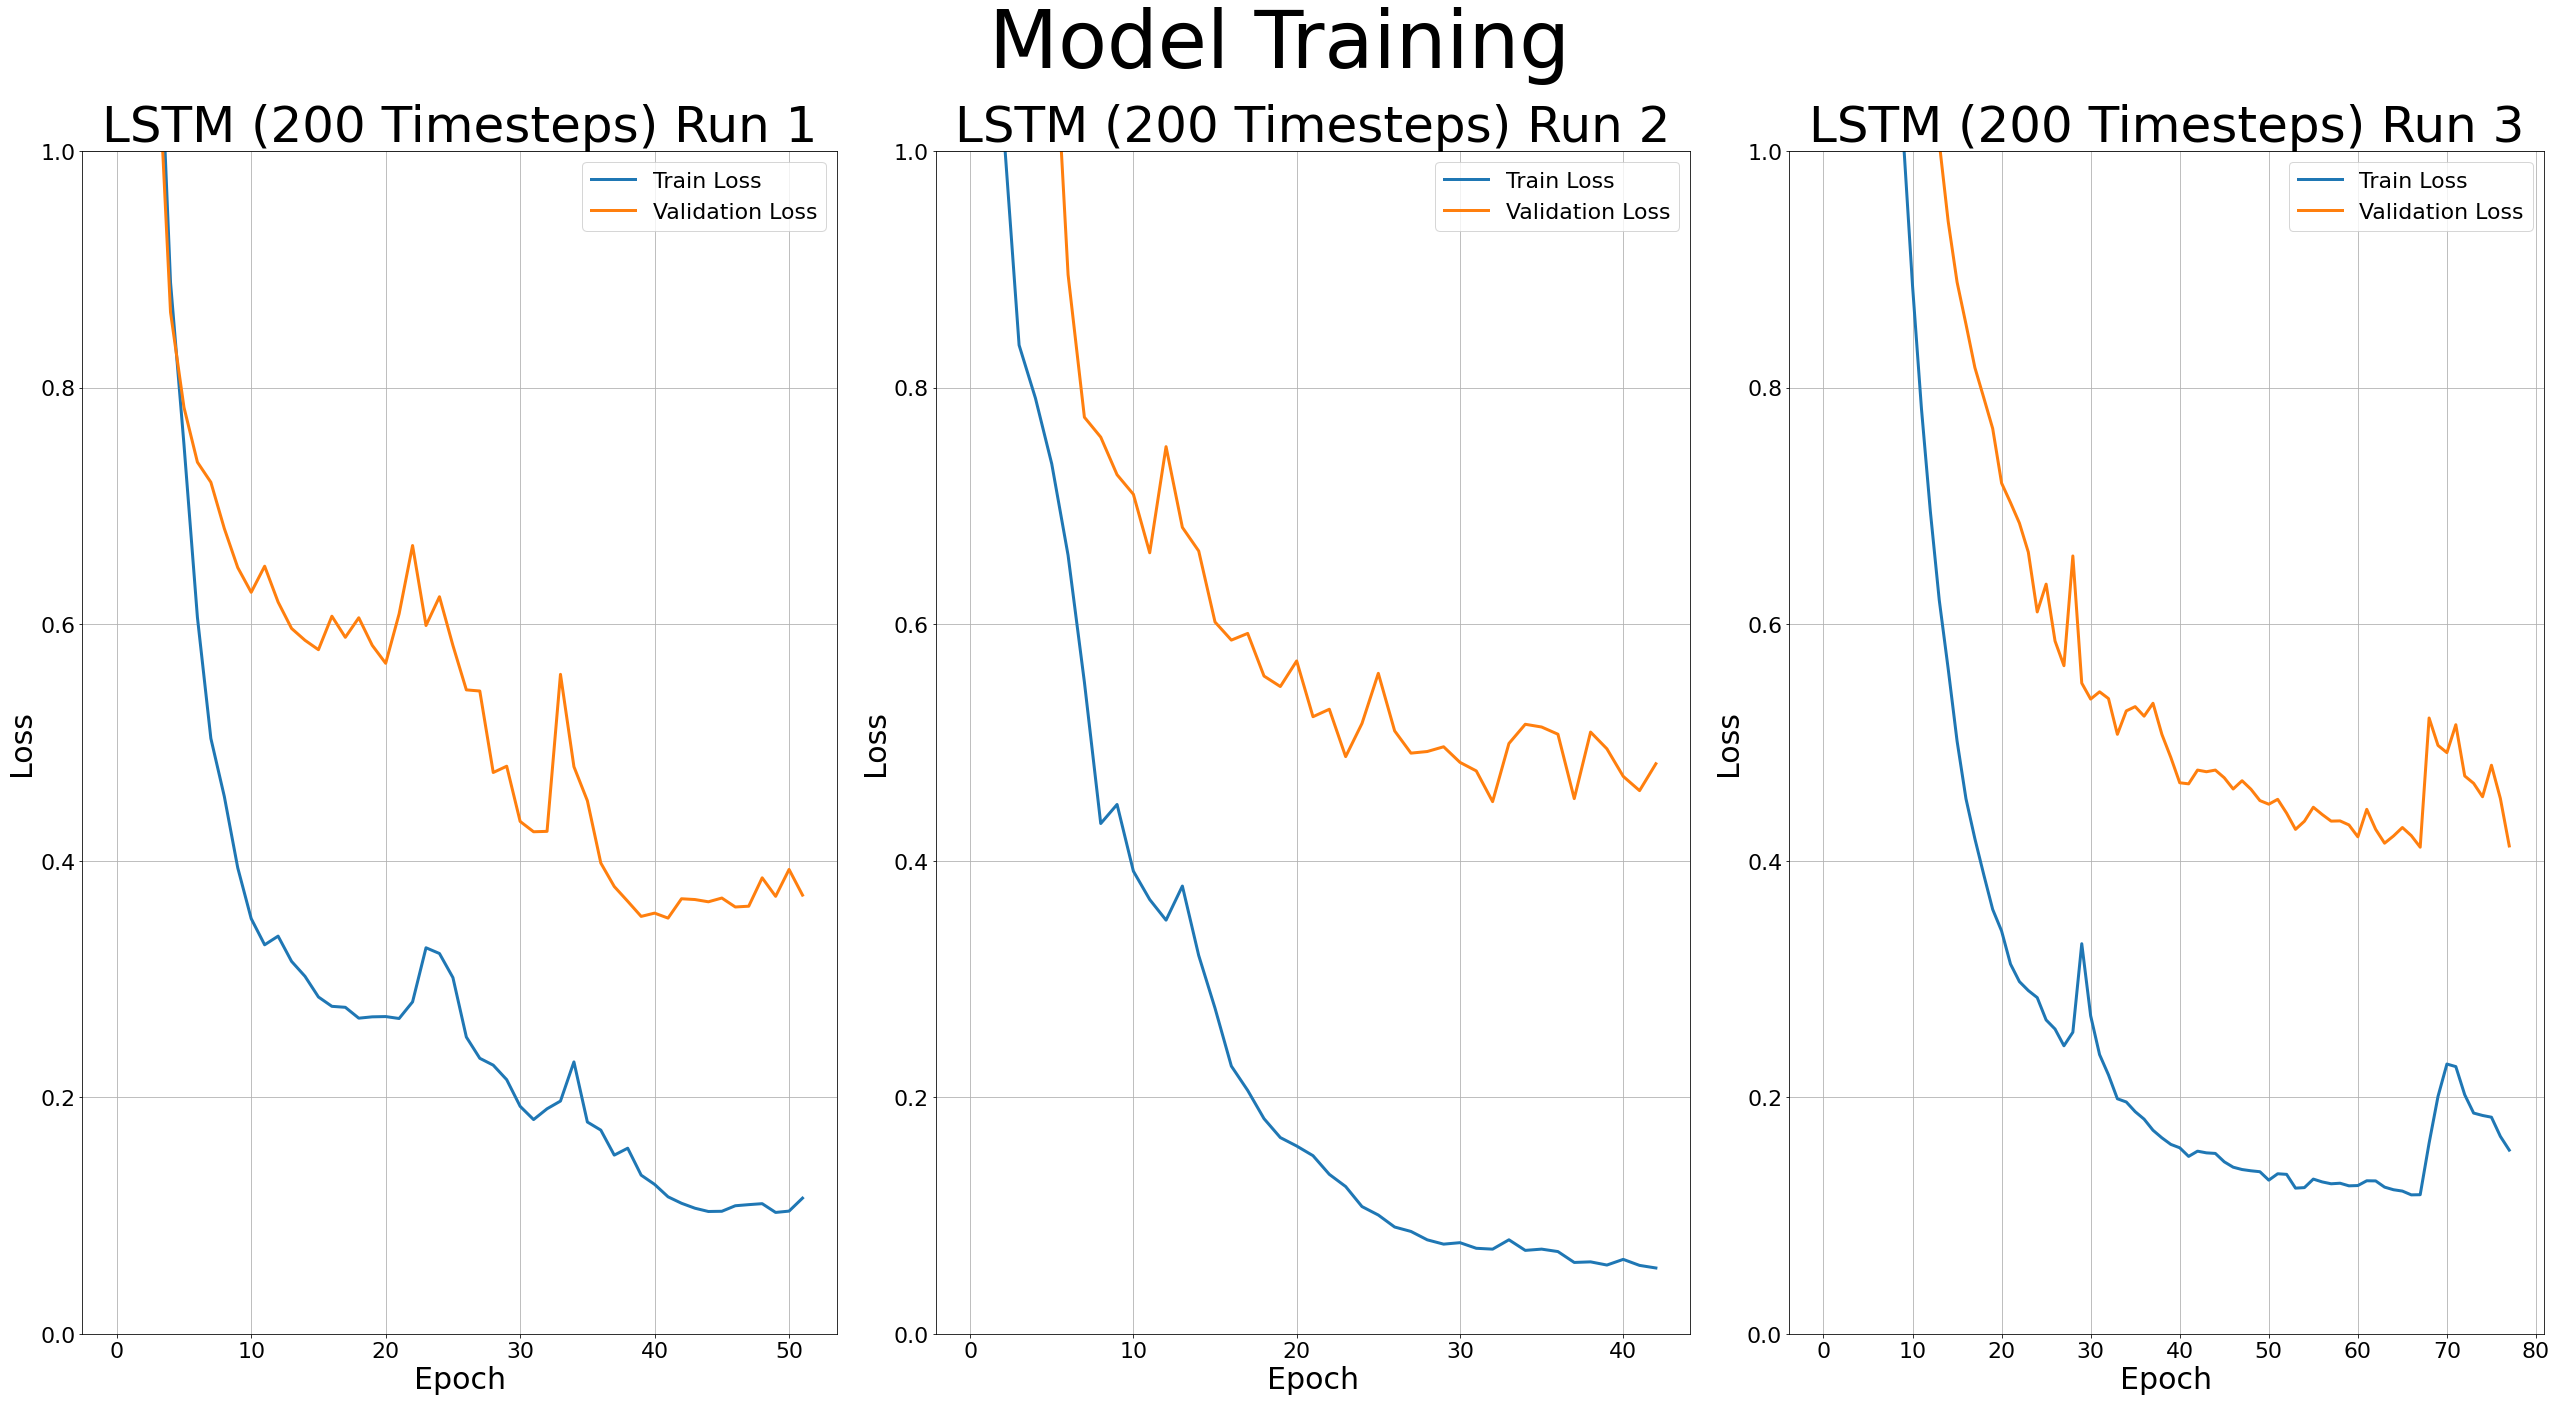

In [27]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('lstm_150_1','lstm_200_2','lstm_250_3'),
                           ('LSTM (200 Timesteps) Run 1','LSTM (200 Timesteps) Run 2','LSTM (200 Timesteps) Run 3')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim([0,1])
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()